In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


C:\Users\haochen shi\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [5]:
 ANN_metrics = pd.read_csv('ANN_metrics.csv').dropna()
 DNN_metrics = pd.read_csv('dnn_metrics.csv').dropna()
 NN_metrics = pd.read_csv('NN_metrics.csv').dropna()
 LSTM_metrics = pd.read_csv('LSTM_metrics.csv').dropna()
 L_R_metrics= pd.read_csv('Linear_Regression_metrics.csv').dropna()


In [19]:
import pandas as pd

# Load your data frames
ANN_metrics = pd.read_csv('ANN_metrics.csv').dropna()
DNN_metrics = pd.read_csv('dnn_metrics.csv').dropna()
NN_metrics = pd.read_csv('NN_metrics.csv').dropna()
LSTM_metrics = pd.read_csv('LSTM_metrics.csv').dropna()
L_R_metrics = pd.read_csv('Linear_Regression_metrics.csv').dropna()

# Set the index to 'Metric' for each data frame
ANN_metrics.set_index('Metric', inplace=True)
DNN_metrics.set_index('Metric', inplace=True)
NN_metrics.set_index('Metric', inplace=True)
LSTM_metrics.set_index('Metric', inplace=True)
L_R_metrics.set_index('Metric', inplace=True)

# Join the data frames iteratively
combined_metrics = ANN_metrics.join(DNN_metrics, how='inner', lsuffix='_ANN', rsuffix='_DNN')
combined_metrics = combined_metrics.join(NN_metrics, how='inner', rsuffix='_NN')
combined_metrics = combined_metrics.join(LSTM_metrics, how='inner', rsuffix='_LSTM')
combined_metrics = combined_metrics.join(L_R_metrics, how='inner', rsuffix='_LR')

# Display the combined data frame
combined_metrics.reset_index(inplace=True)
combined_metrics


,Metric,Total ANN,SH ANN,DWH ANN,Total DNN,SH DNN,DWH DNN,Total NN,SH NN,DWH NN,Total LSTM,SH LSTM,DWH LSTM,Total Linear Regression,SH Linear Regression,DWH Linear Regression
0,MAE,0.023609,0.026568,0.029841,0.029674,0.029674,0.029543,0.032802,0.029221,0.034543,0.025334,0.025654,0.028523,0.113447,0.122225,0.127675
1,MSE,0.001000,0.001187,0.001493,0.001524,0.001524,0.001489,0.001697,0.001504,0.001902,0.001079,0.001199,0.001452,0.021056,0.024159,0.026605
2,RMSE,0.031620,0.034448,0.038637,0.031291,0.034622,0.038589,0.041194,0.038785,0.043607,0.032855,0.034632,0.038102,0.145107,0.155431,0.163111
3,R2,0.507453,0.415405,0.264588,0.249358,0.249358,0.266425,0.164019,0.258958,0.063241,0.459447,0.399382,0.272991,0.403356,0.315438,0.246108
4,Adjusted R2,0.506265,0.414701,0.263702,0.516489,0.408783,0.265542,0.162002,0.258065,0.062112,0.458959,0.399202,0.272773,0.401917,0.314614,0.245200
5,MAPE,1.116648,1.312003,1.501305,1.509143,1.509143,1.462832,1.648073,1.531254,1.990899,1.651862,1.108085,1.329179,1.843744,2.072026,2.121150


In [20]:

# Create a DataFrame
combined_metrics = pd.DataFrame(combined_metrics)

# Save the DataFrame to a CSV file
combined_metrics.to_csv('combined_metrics.csv', index=False)


In [21]:
combined_metrics

,Metric,Total ANN,SH ANN,DWH ANN,Total DNN,SH DNN,DWH DNN,Total NN,SH NN,DWH NN,Total LSTM,SH LSTM,DWH LSTM,Total Linear Regression,SH Linear Regression,DWH Linear Regression
0,MAE,0.023609,0.026568,0.029841,0.029674,0.029674,0.029543,0.032802,0.029221,0.034543,0.025334,0.025654,0.028523,0.113447,0.122225,0.127675
1,MSE,0.001000,0.001187,0.001493,0.001524,0.001524,0.001489,0.001697,0.001504,0.001902,0.001079,0.001199,0.001452,0.021056,0.024159,0.026605
2,RMSE,0.031620,0.034448,0.038637,0.031291,0.034622,0.038589,0.041194,0.038785,0.043607,0.032855,0.034632,0.038102,0.145107,0.155431,0.163111
3,R2,0.507453,0.415405,0.264588,0.249358,0.249358,0.266425,0.164019,0.258958,0.063241,0.459447,0.399382,0.272991,0.403356,0.315438,0.246108
4,Adjusted R2,0.506265,0.414701,0.263702,0.516489,0.408783,0.265542,0.162002,0.258065,0.062112,0.458959,0.399202,0.272773,0.401917,0.314614,0.245200
5,MAPE,1.116648,1.312003,1.501305,1.509143,1.509143,1.462832,1.648073,1.531254,1.990899,1.651862,1.108085,1.329179,1.843744,2.072026,2.121150


# ploting 

In [37]:
 combined_metrics = pd.read_csv('combined_metrics.csv').dropna()


In [39]:

# Reset the index to get 'Metric' as a column again
combined_metrics.reset_index(inplace=False)


# Prepare the data for plotting
metrics = combined_metrics['Metric'].tolist()
models = ['Total', 'SH', 'DWH']
model_metrics = ['ANN', 'DNN', 'NN', 'LSTM', 'LR']

In [40]:
combined_metrics

,Metric,Total ANN,SH ANN,DWH ANN,Total DNN,SH DNN,DWH DNN,Total NN,SH NN,DWH NN,Total LSTM,SH LSTM,DWH LSTM,Total Linear Regression,SH Linear Regression,DWH Linear Regression
0,MAE,0.023609,0.026568,0.029841,0.029674,0.029674,0.029543,0.032802,0.029221,0.034543,0.025334,0.025654,0.028523,0.113447,0.122225,0.127675
1,MSE,0.001000,0.001187,0.001493,0.001524,0.001524,0.001489,0.001697,0.001504,0.001902,0.001079,0.001199,0.001452,0.021056,0.024159,0.026605
2,RMSE,0.031620,0.034448,0.038637,0.031291,0.034622,0.038589,0.041194,0.038785,0.043607,0.032855,0.034632,0.038102,0.145107,0.155431,0.163111
3,R2,0.507453,0.415405,0.264588,0.249358,0.249358,0.266425,0.164019,0.258958,0.063241,0.459447,0.399382,0.272991,0.403356,0.315438,0.246108
4,Adjusted R2,0.506265,0.414701,0.263702,0.516489,0.408783,0.265542,0.162002,0.258065,0.062112,0.458959,0.399202,0.272773,0.401917,0.314614,0.245200
5,MAPE,1.116648,1.312003,1.501305,1.509143,1.509143,1.462832,1.648073,1.531254,1.990899,1.651862,1.108085,1.329179,1.843744,2.072026,2.121150


<BarContainer object of 6 artists>

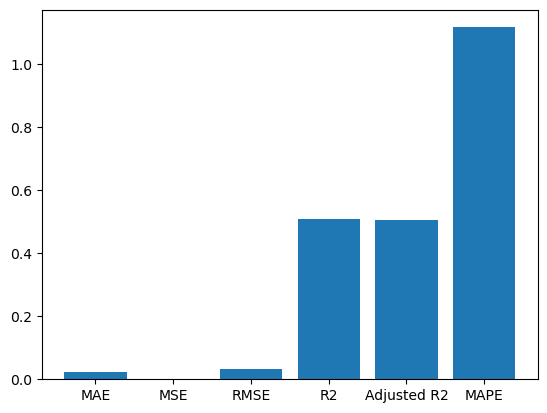

In [44]:
plt.bar(combined_metrics['Metric'],combined_metrics['Total ANN'])


Index(['Metric', 'Total ANN', 'SH ANN', 'DWH ANN', 'Total DNN', 'SH DNN',
       'DWH DNN', 'Total NN', 'SH NN', 'DWH NN', 'Total LSTM ', 'SH LSTM',
       'DWH LSTM', 'Total Linear Regression', 'SH Linear Regression',
       'DWH Linear Regression'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

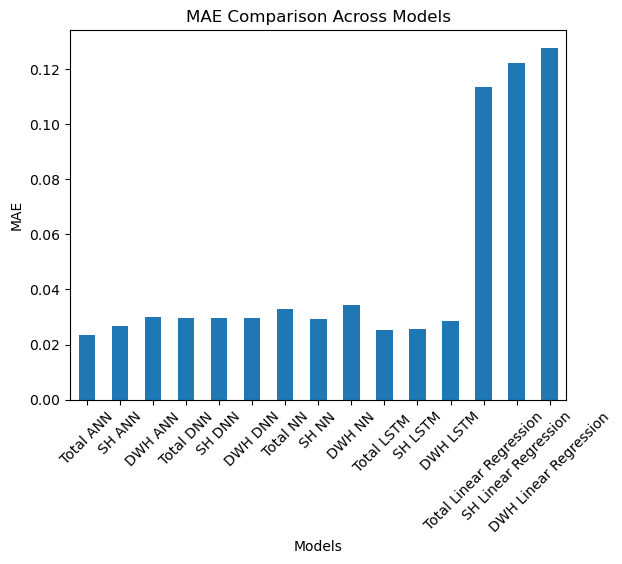

<Figure size 1000x600 with 0 Axes>

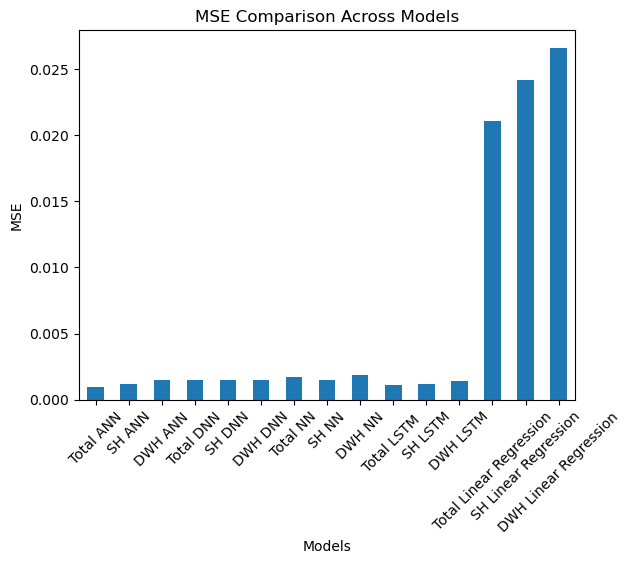

<Figure size 1000x600 with 0 Axes>

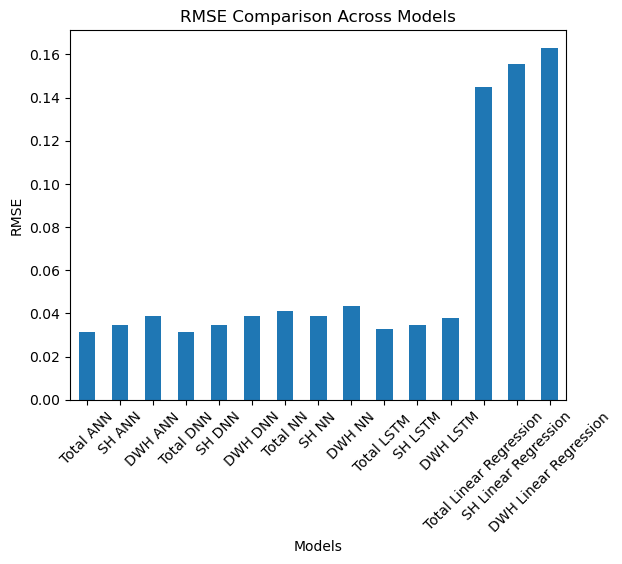

<Figure size 1000x600 with 0 Axes>

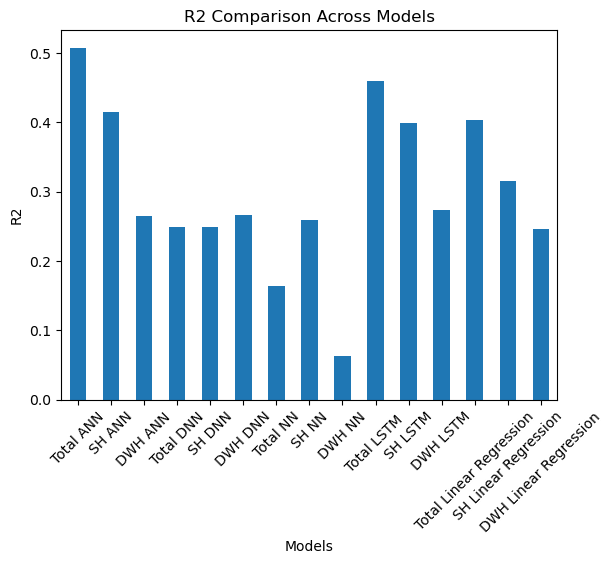

<Figure size 1000x600 with 0 Axes>

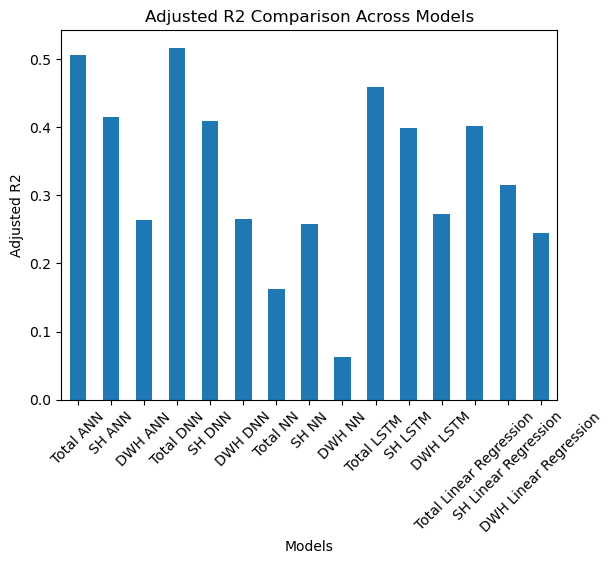

<Figure size 1000x600 with 0 Axes>

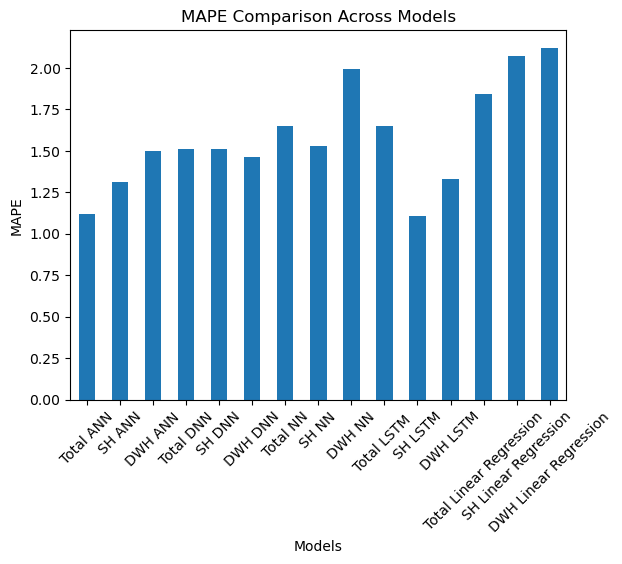

In [41]:

# Print the columns to inspect them
print(combined_metrics.columns)

# Plotting each metric
for metric in combined_metrics['Metric']:
    data_to_plot = combined_metrics[combined_metrics['Metric'] == metric].drop(columns='Metric').T
    data_to_plot.columns = ['Value']
    
    plt.figure(figsize=(10, 6))
    data_to_plot.plot(kind='bar', legend=None)
    
    plt.title(f'{metric} Comparison Across Models')
    plt.xlabel('Models')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    
    plt.show()

<Figure size 1000x600 with 0 Axes>

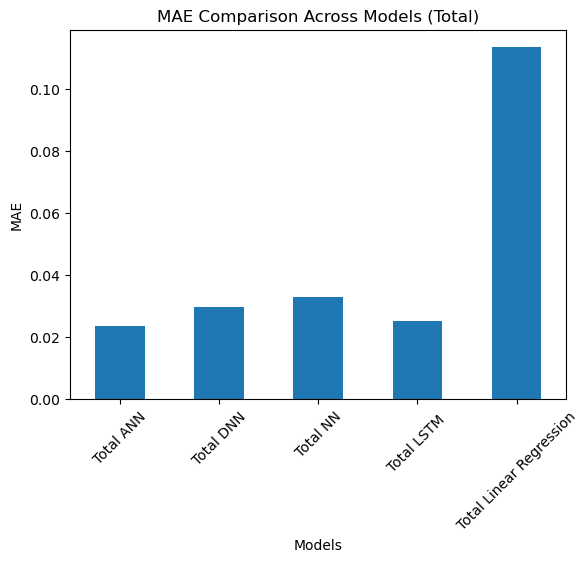

<Figure size 1000x600 with 0 Axes>

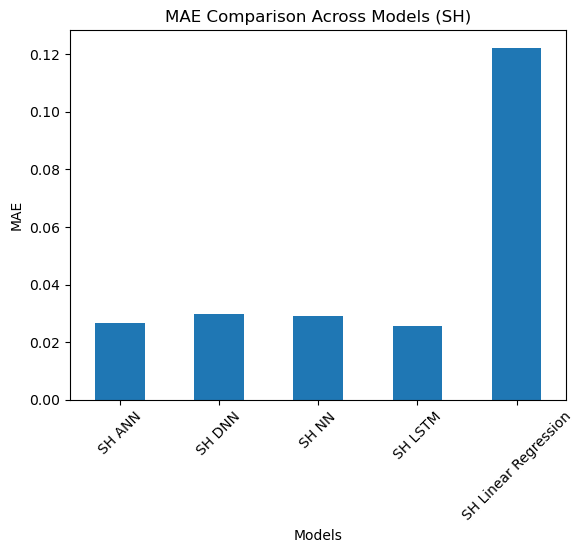

<Figure size 1000x600 with 0 Axes>

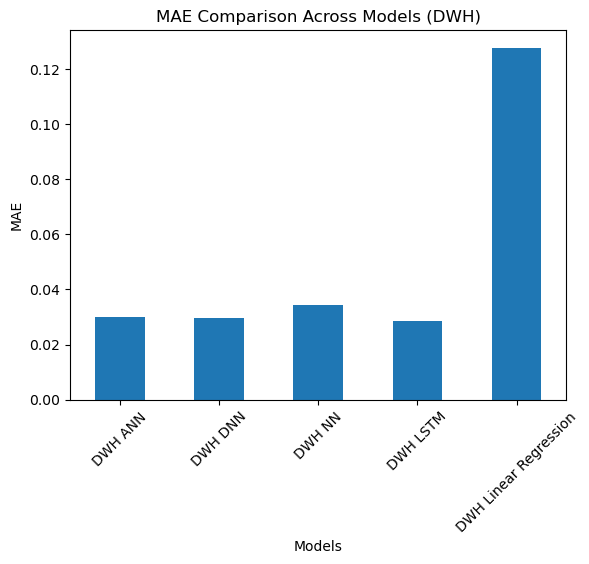

<Figure size 1000x600 with 0 Axes>

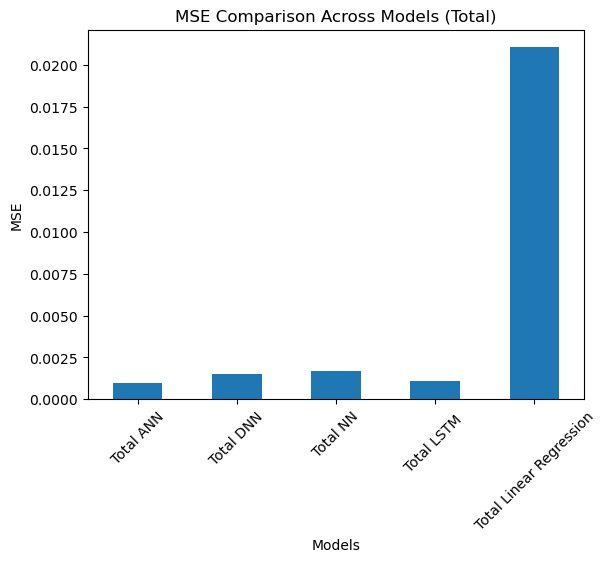

<Figure size 1000x600 with 0 Axes>

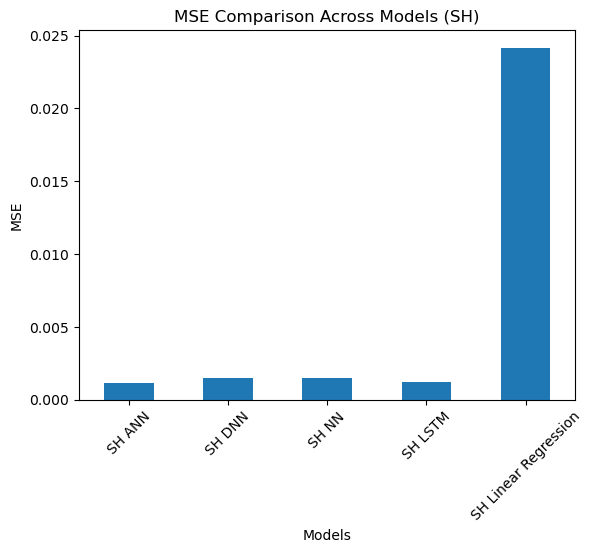

<Figure size 1000x600 with 0 Axes>

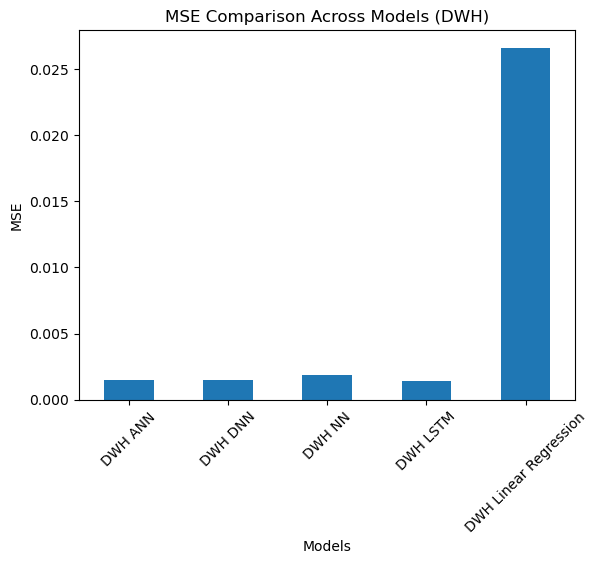

<Figure size 1000x600 with 0 Axes>

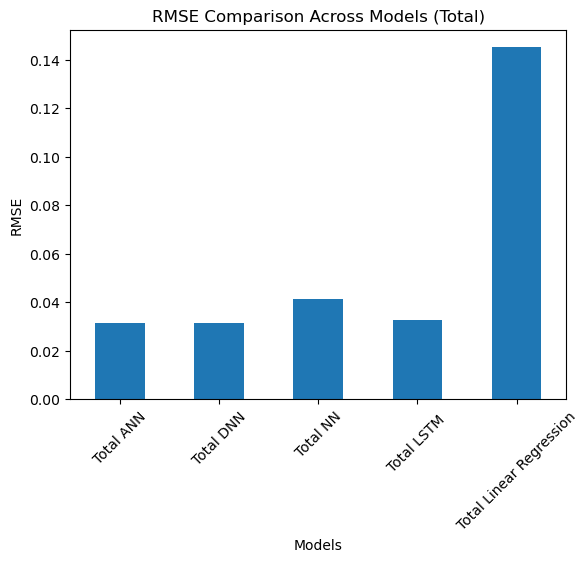

<Figure size 1000x600 with 0 Axes>

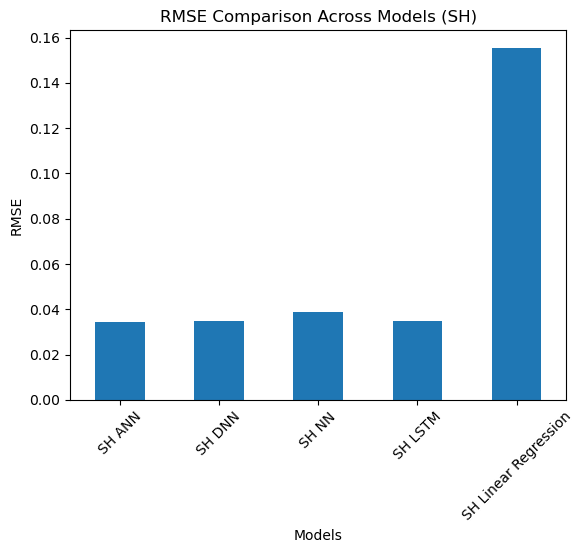

<Figure size 1000x600 with 0 Axes>

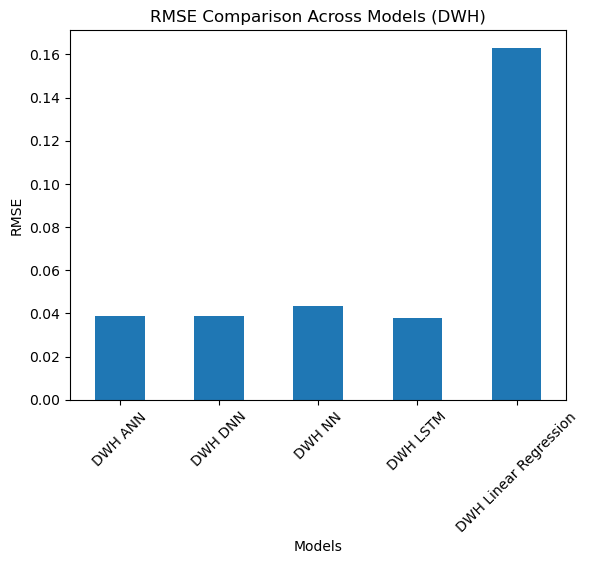

<Figure size 1000x600 with 0 Axes>

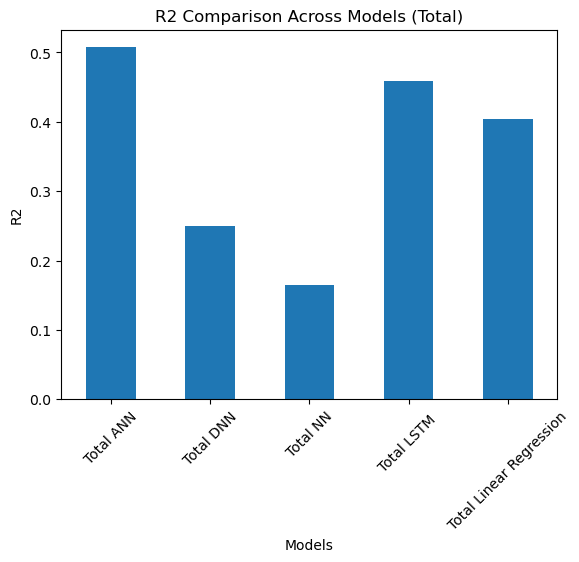

<Figure size 1000x600 with 0 Axes>

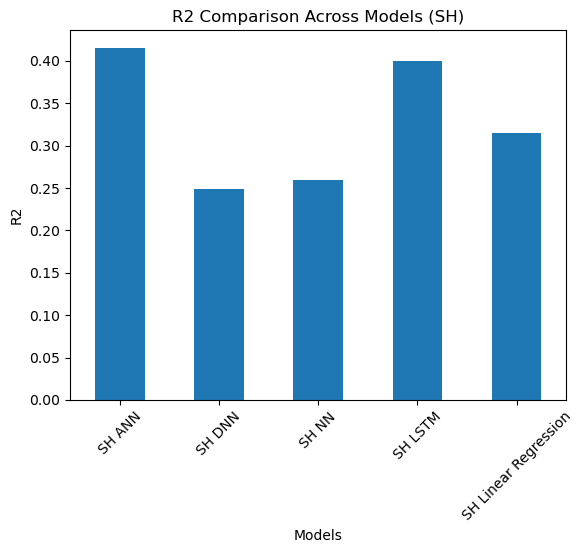

<Figure size 1000x600 with 0 Axes>

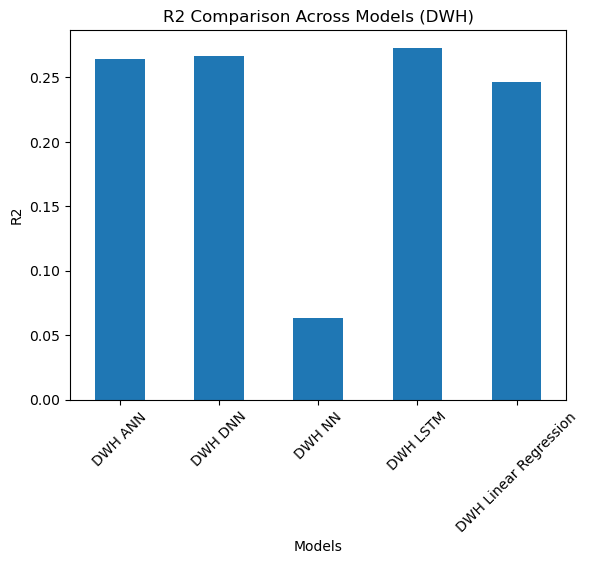

<Figure size 1000x600 with 0 Axes>

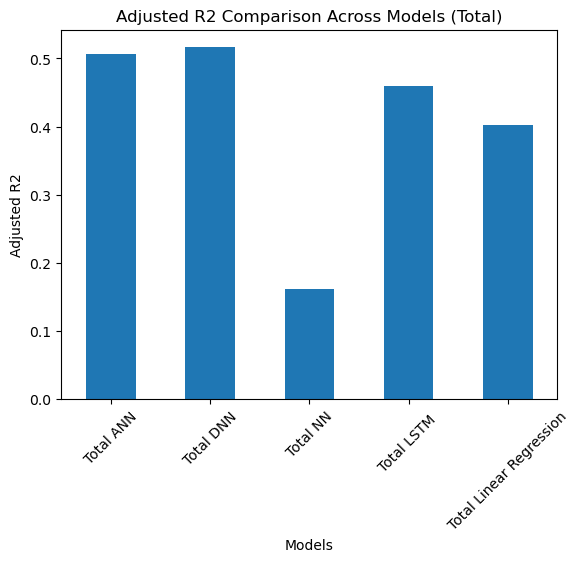

<Figure size 1000x600 with 0 Axes>

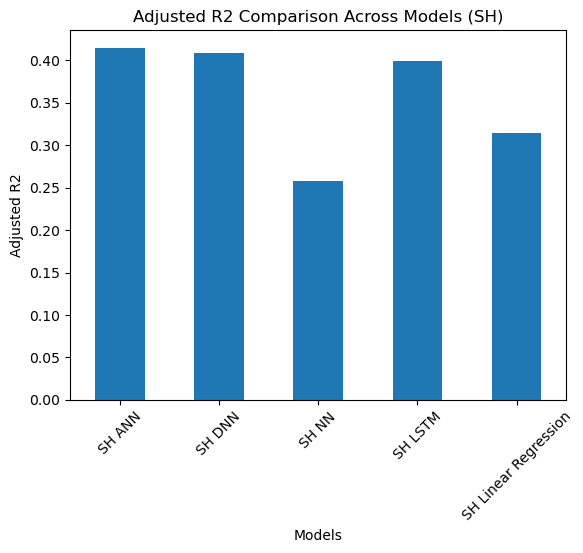

<Figure size 1000x600 with 0 Axes>

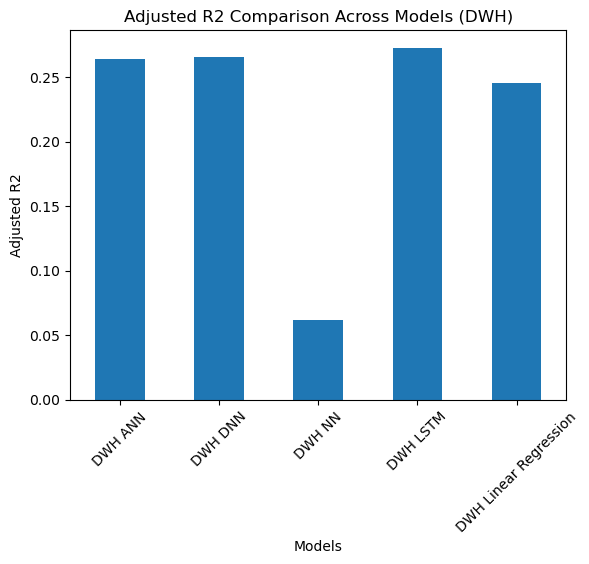

<Figure size 1000x600 with 0 Axes>

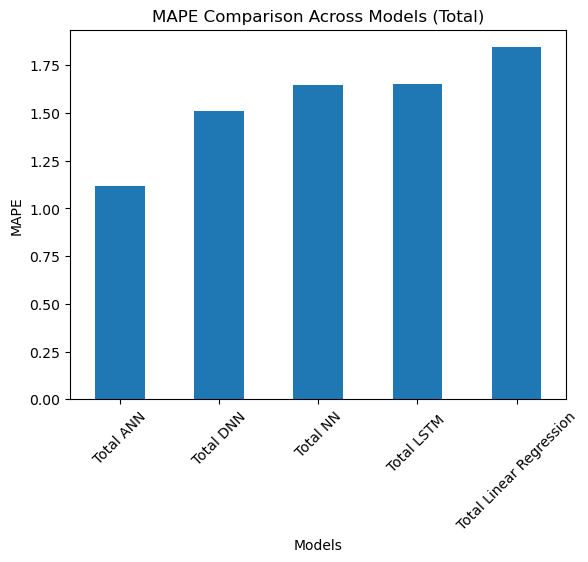

<Figure size 1000x600 with 0 Axes>

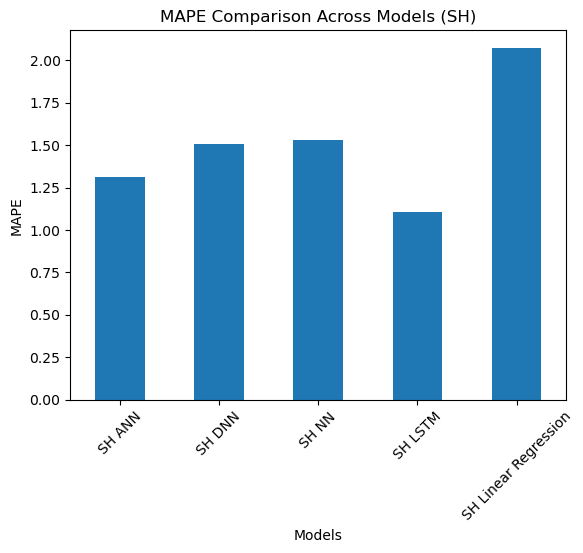

<Figure size 1000x600 with 0 Axes>

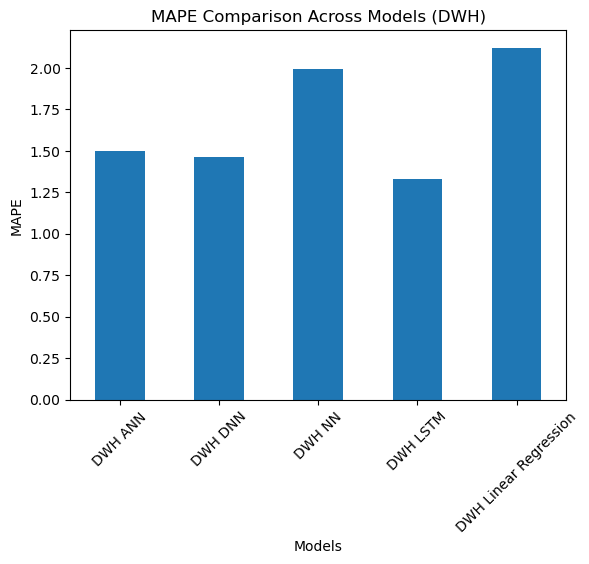

In [42]:

# Plotting each metric separately for Total, SH, and DWH values
for metric in combined_metrics['Metric']:
    for suffix in ['Total', 'SH', 'DWH']:
        columns_to_plot = [col for col in combined_metrics.columns if suffix in col]
        
        data_to_plot = combined_metrics[combined_metrics['Metric'] == metric][columns_to_plot].T
        data_to_plot.columns = ['Value']
        
        plt.figure(figsize=(10, 6))
        data_to_plot.plot(kind='bar', legend=None)
        
        plt.title(f'{metric} Comparison Across Models ({suffix})')
        plt.xlabel('Models')
        plt.ylabel(metric)
        plt.xticks(rotation=45)
        
        plt.show()